In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

In [2]:
df = pd.read_csv("../graph/exam2_output.csv")
df.head()

,x1,x2,z
0,0.0,-1.0,3.000000
1,-0.1,-1.0,5.914311
2,0.1,-1.0,6.171811
3,0.1,-0.9,7.631924
4,0.0,-0.9,7.672285


In [3]:
X = df[["x1", "x2"]]
z = df["z"]

In [4]:
from sklearn.neural_network import MLPRegressor

In [5]:
N = 100

In [6]:
NN = MLPRegressor(hidden_layer_sizes=([N]*7), activation="relu", random_state=1, max_iter=2000)
NN.fit(X, z)
predict = NN.predict(X)
print(NN.score(X, z))

0.999423964086615


In [7]:
X1 = df["x1"]
X2 = df["x2"]
Z = np.array(df['z'])

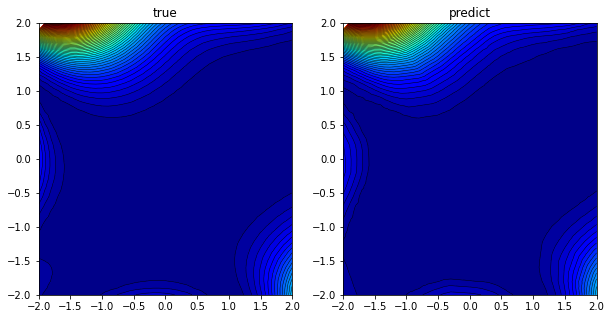

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].set_title("true")
ax[0].tricontour(X1, X2, Z, 50, linewidths=0.5, colors='k')
ax[0].tricontourf(X1, X2, Z, 50, cmap=cm.jet)

ax[1].set_title("predict")
ax[1].tricontour(X1, X2, predict, 50, linewidths=0.5, colors='k')
ax[1].tricontourf(X1, X2, predict, 50 ,cmap=cm.jet)

plt.show()

In [9]:
print(f"x1: {X1[predict.argmin()]} x2: {X2[predict.argmin()]} z: {predict[predict.argmin()]}")

x1: -0.5 x2: -1.1 z: 192.12219083332892


In [10]:
coef = NN.coefs_[0]
intercept = NN.intercepts_[0]
print(coef.shape)
print(intercept.shape)

(2, 100)
(100,)
